## Some necessary library imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [25]:
file_name = "RELIANCE"

## Some data preprocessing

In [26]:
data = pd.read_csv(file_name+'_l.csv')
data.drop(['Unnamed: 0'],axis = 1, inplace = True)
y = pd.DataFrame(data['CloseNext'])
X = data.drop(['CloseNext'], axis = 1)

In [27]:
X = np.array(X)
y = np.array(y)
#X = X[1700:2030,:]
#y = y[1700:2030,:]
y = y.flatten()

Feature scaling

In [28]:
scaled = StandardScaler()
scaled.fit(X)
X = scaled.transform(X)

Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Support Vector Machine Regression

Performing Grid Search for finding best parameters for SVM Regression

In [30]:
parameters = {'kernel':('poly', 'rbf'), 'C':[10000,20000,30000,50000,100000],'degree':[1,2],'epsilon':[0.1,1,2,4,5],'tol': [0.1,0.5]}
sv = SVR(gamma = 'auto')
grid_search = GridSearchCV(sv, parameters, verbose = 3 ,cv = 3)

In [31]:
#grid_search.fit(X_train,y_train)

In [32]:
#grid_search.best_estimator_

In [33]:
SVR(C=30000, cache_size=200, coef0=0.0, degree=1, epsilon=5, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

SVR(C=30000, degree=1, epsilon=5, gamma='auto', kernel='poly', tol=0.1)

In [34]:
from sklearn.svm import SVR
svm_regression = SVR()
svm_regression.fit(X_train, y_train)

SVR()

In [35]:
svm_predict = svm_regression.predict(X_test)

## Testing

In [36]:
error = mean_absolute_error(svm_predict,y_test)
per_err = (error/np.mean(y_test)) * 100

In [37]:
print('The mean absolute error is {} and percentage error is {}.'.format(error,per_err))

The mean absolute error is 201.33260311523807 and percentage error is 26.109808626470315.


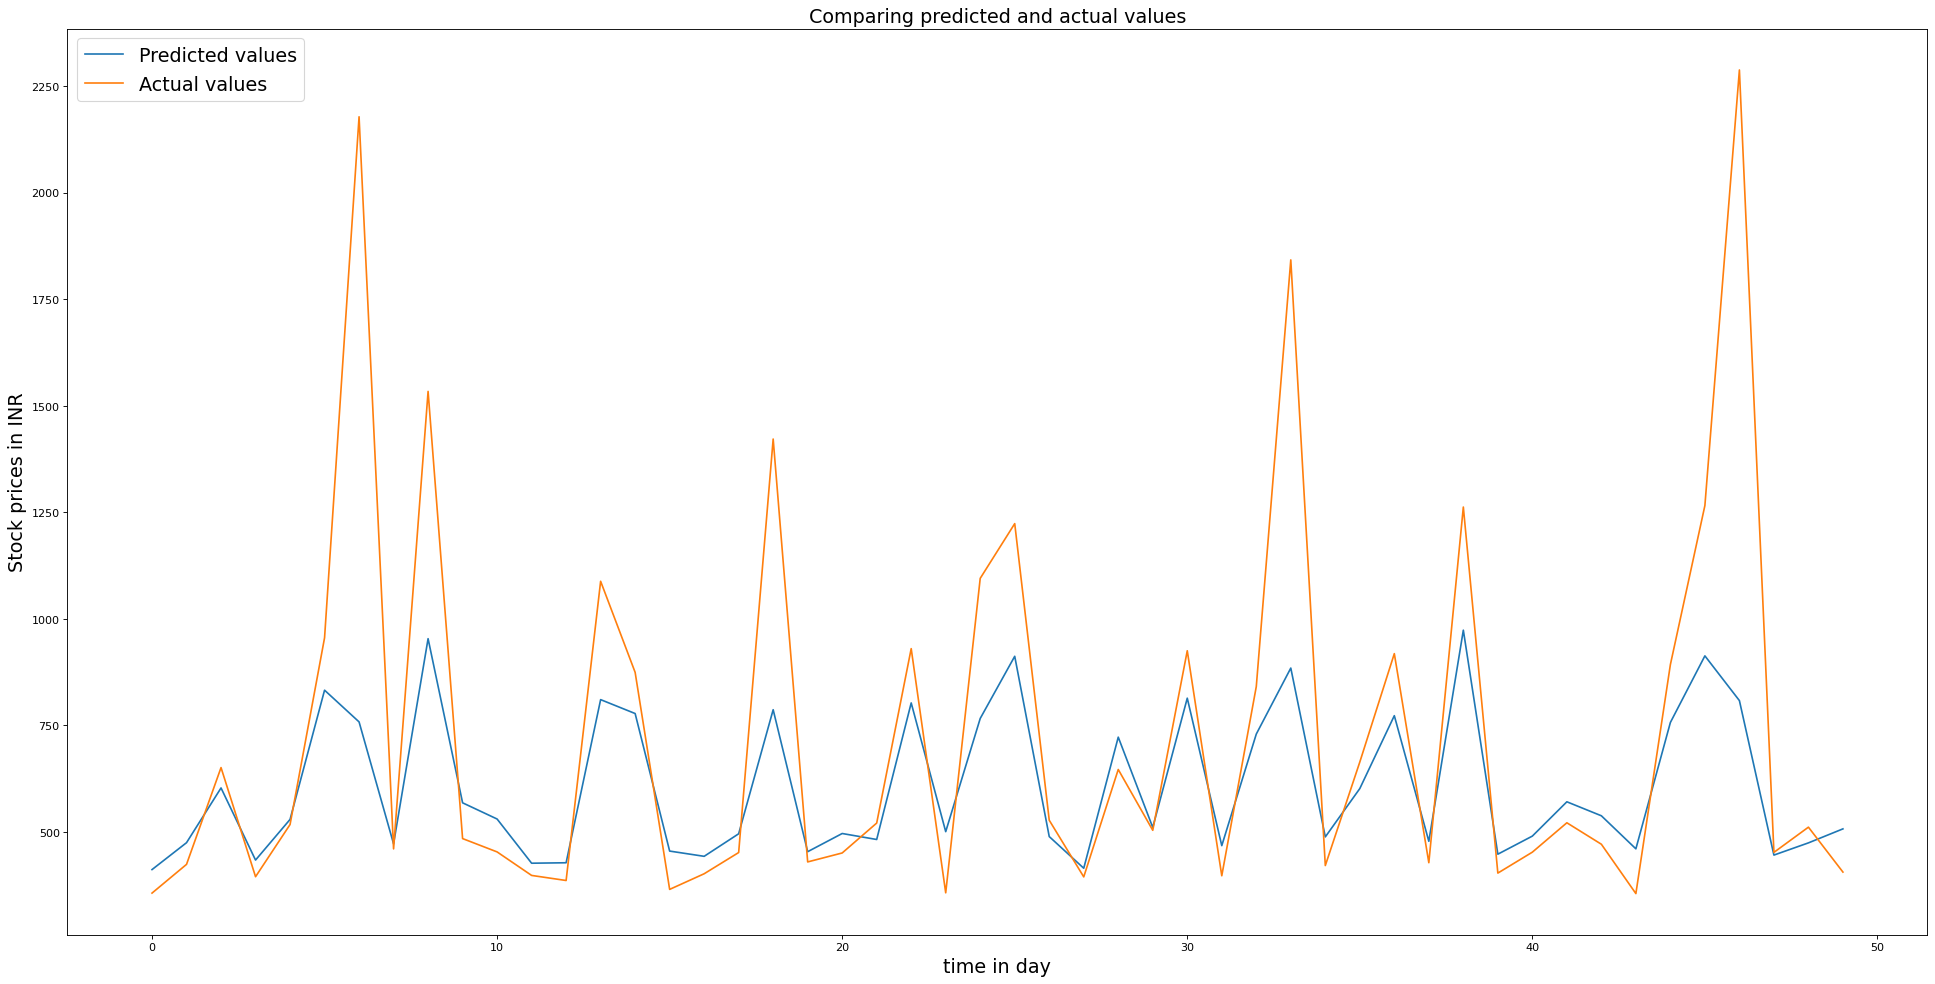

In [38]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svm_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('Comparing predicted and actual values', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()

In [ ]:
X_